### **Lab 2: Introduction to Complex Exponentials**

The goal of this laboratory is to gain familiarity with complex numbers and their use in representing sinusoidal signals as complex exponentials.

**Complex Numbers in Python**


Python can be used to compute complex-valued formulas and also to display the results as a vector or “phasor” diagrams.

Here are some of numpy package complex number functions (remember to import package):

*conj ()*       Complex conjugate

*abs ()*        Magnitude

*angle ()*      Angle (or phase) in radians

*real ()*       Real part

*imag ()*       Imaginary part
*j *        pre-defined as <math>&radic;-1</math>

*x = 3 + 4j*    j sufix defines imaginary constant

exp(1j<math>*</math>theta)  Function for the complex exponential

Each of these functions takes a vector (or matrix) as its input argument and operates on each element of the vector.

To display a complex number as a point in the complex plane you can directly use the provided function `plot_complex`. It can take a single number or a list of complex numbers as input. For instance, to display the complex number 2+1j:

In [3]:
import numpy as np
from IPython.display import Audio

from util import load_audio, save_audio, plot_signals, plot_complex

In [5]:
z = 2 + 1j
plot_complex(z)

And for displaying several complex numbers:

In [6]:
z1 = 2 + 1j
z2 = 1j
z3 = -0.5j
plot_complex([z1, z2, z3], name=['z1', 'z2', 'z3'])

# **Exercises**

**1. Complex Numbers**

To exercise your understanding of complex numbers, do the following:

1.1. Define $z_1 = -1+j0.3$ and $z_2 = 0.8+j0.7$. Enter these in Python and plot them as points and vectors in the complex plane.

In [7]:
z1 = -1 +0.3j
z2 = 0.8 + 0.7j
plot_complex([z1, z2], name=['z1', 'z2'])

1.2. Compute the conjugate z* and the inverse 1/z for both $z_1$ and $z_2$ and plot the results as vectors in the complex plane.

In [8]:
z1_conj = np.conj(z1)
z2_conj = np.conj(z2)

z1_invers = 1/z1
z2_invers = 1/z2

plot_complex([z1, z2, z1_conj, z2_conj, z1_invers, z2_invers], name=['z1', 'z2', 'z1_conj', 'z2_conj', 'z1_invers', 'z2_invers'])

**2. Complex Exponentials**

Now let's work with complex exponentials. In python is very easy to work with these type of signals:

In [9]:
A = 0.1
f0 = 666.66
fs = 44100
phi = np.pi/2
t = np.arange(0, .1, 1.0/fs)
x = A * np.exp(1j*(2*f0*np.pi*t + phi))

Now we can plot the real and imaginary part of this signal:


In [10]:
plot_signals([np.real(x), np.imag(x)], fs, name=['real part', 'imag part'])

2.1. Define a complex exponential with the same parameters that those from Lab 1 (Ex 3.1) and plot the real part.

In [11]:
plot_signals([np.real(x)], fs, name=['real part'])

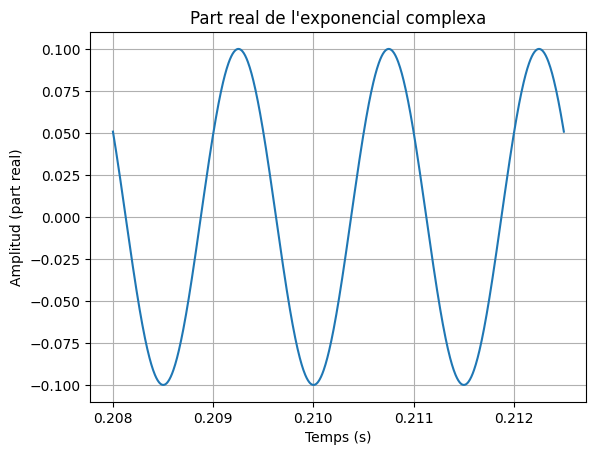

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Els mateixos paràmetres que l'exercici 3.1 (Lab1)
A = 0.1
f = 666.66
P = np.pi
t_start = 0.208
T = 1/f
t_end = t_start + 3*T
t = np.linspace(t_start, t_end, 1000)

#Definim l'exponencial complexa
complex_exp = A * np.exp(1j * (2 * np.pi * f * t + P))

#Representem només la part real i afegim títols
plt.plot(t, np.real(complex_exp))
plt.xlabel("Temps (s)")
plt.ylabel("Amplitud (part real)")
plt.title("Part real de l'exponencial complexa")
plt.grid(True)
plt.show()

**3. Harmonic signals**

Now, we will work with harmonic signals. Until now, we have been working with simple sinusoids signals but most musical instruments sounds are harmonic. This means that they are formed by a sinusoid of the fundamental frequency plus sinusoids with frequencies multiples of it. For instance, we can define the following signal formed by the fundamental frequency plus the second and the third harmonic (note that each wave has a different phase).

3.1. Load your reference audio signal and plot some periods (5-10) where the amplitude is stable. For instance see Ex. 2.3 from Lab 1.

In [13]:
filepath = "audio/so_guitarra.wav"
ref, fs = load_audio(filepath)

f = 666.66
T = 1/f

t_start = 0.208
t_end = t_start + 8*T

plot_signals(ref, fs, t_start, t_end)

3.2. Now, define a harmonic signal, `y` whose fundamental frequency is the defined in Lab 1. Go step by step adding a new harmonic in each step. Plot both signals (the reference and the synthesized) and try to reproduce the shape of the reference signal.

**Note 1**: in order to have a similar shape, we need to select the amplitudes and phases carefully. One way to do this is to define the harmonic signal as follows:

$$y(t) = \sum_{k=1}^K A_k\cos\left(2\pi kf_0 t + k \phi - (k-1)\pi/2 \right), $$

where $K$ is the number of harmonics, $f_0$ is the fundamental frequency, $A_k$ is the amplitude (weight) of each harmonic and $\phi$ is the phase of the signal (defined in Lab1 Ex 2.4).

**Note 2**:
Define the $A_k$ values relative to the fundamental frequency. This means to define $A_1=1$ and the others less than 1. You can use Audacity to plot the spectrum of the fragment selected of the reference audio and measure the relative amplitudes of the harmonics.

**Note 3**: Normalize the amplitude of the signal by the same amplitude of the reference. For instance, if the amplitude of the reference signal is 0.33, you can normalize the syntesized signal by first dividing by its maximum and then multiplyng by 0.33:

```
y = 0.33 * y / np.amax(y)
```

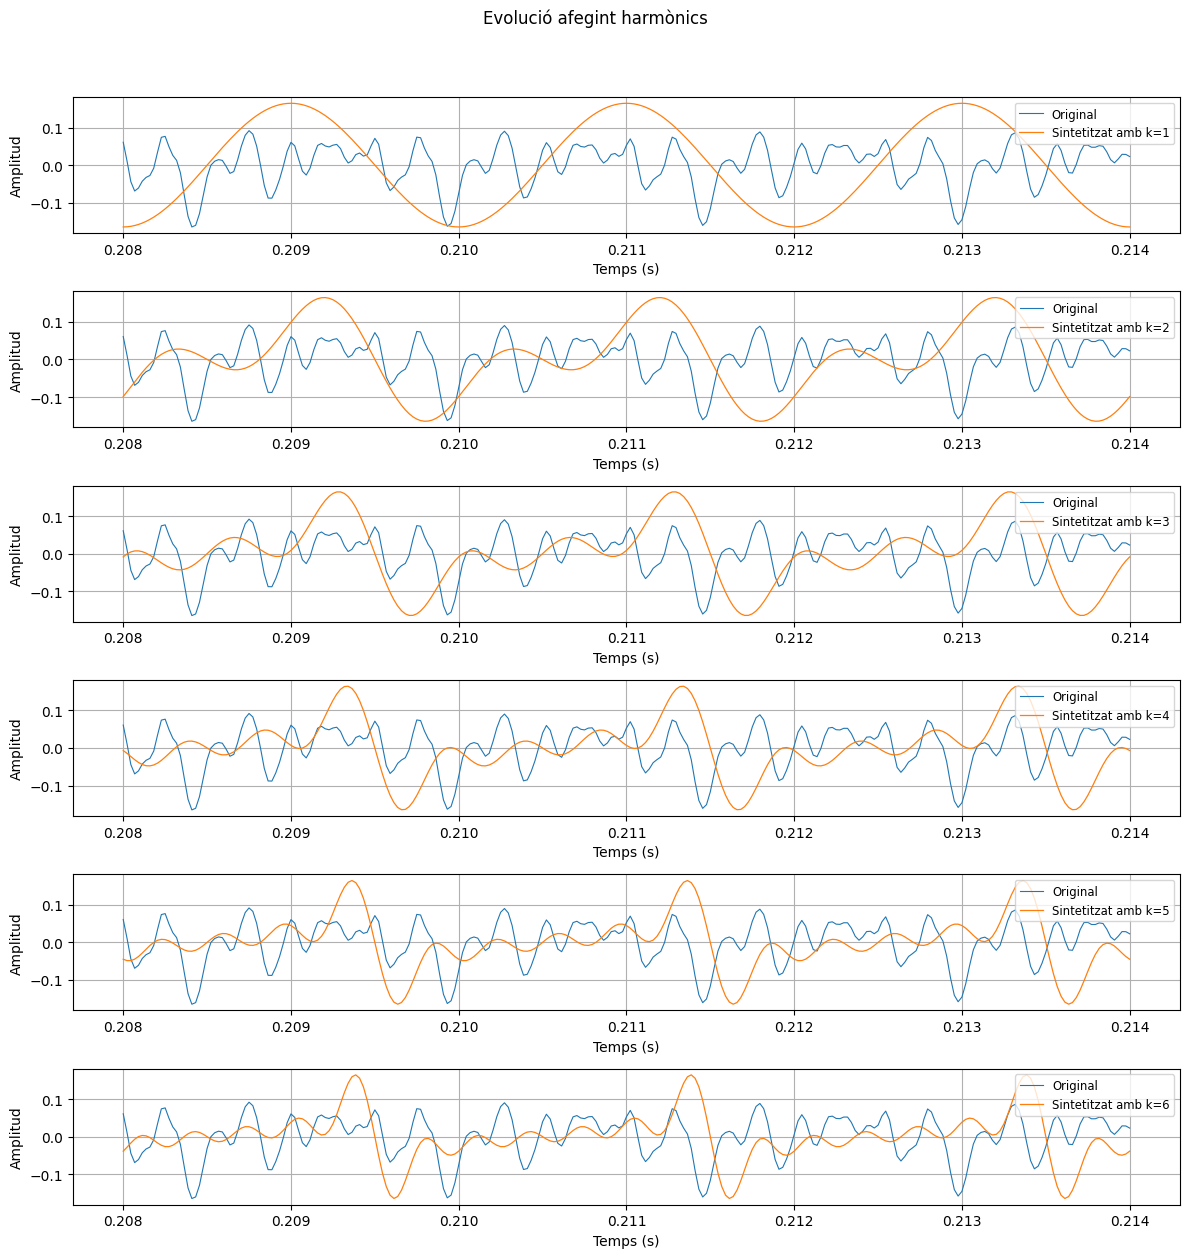

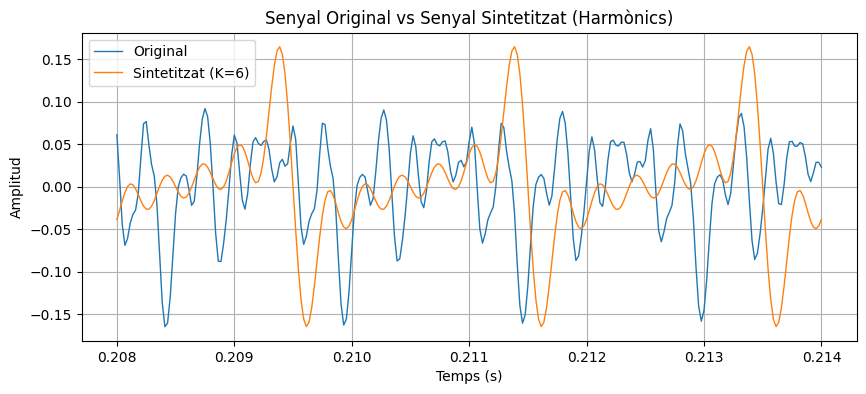

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import interp

#Afegim els paràmetres de sempre, tot i que si hem executat tots els passos anteriors no seria necessari
ref, fs = load_audio(filepath)      
f = 500                             #Freqüència fonamental real
P = np.pi                        
t_start = 0.208
T = 1/f
t_end = t_start + 3*T
t = np.linspace(t_start, t_end, 1000)
inici = int(t_start * fs)   #Posició inicial dins del vector ref
final = int(t_end * fs)     #Posició final dins del vector ref
total = ref[inici:final]    #Fragment del senyal original
t_original = np.linspace(t_start, t_end, len(total))    #Vector de temps

#Definim k harmònics
K = 6  

#Definim les amplituds relatives a partir de mirar-les a la gràfica de l'activitat 3.1 (Lab2)
A_rel = np.array([1.0, 0.9, 0.88, 0.86, 0.83, 0.81])

ref_max = np.amax(np.abs(total))       #Agafem l'amplitud màxima en absolut de total
if ref_max == 0:       #Si l'apmplitud és 0, li assignem 1
   ref_max = 1.0  

#Observarem l'evolució dels harmònics
plt.figure(figsize=(12, 2.2 * K))       #Creem una figura amb k gràfiques
y_parcial = np.zeros_like(t)    #Creem un array de zeros del mateix tamany de t que omplirem de la suma 
                                #dels harmònics del senyal sintetizat
for k in range(1, K+1):         #Iterem sobre els harmònics
    Ak = A_rel[k-1]             #Definim l'amplitud
    P_k = k * P - (k-1) * np.pi/2     #Definim la fase
    y_parcial += Ak * np.cos(2*np.pi * (k * f) * t + P_k)  #Sumem l'harmònic al senyal
    y_normalitzat = ref_max * y_parcial / np.amax(np.abs(y_parcial))  #Normalitzem el senyal sintetitzat  
                                        #perquè tingui la mateixa amplitud màxima que el fragment original
    y_parcial_sintetitzat = interp(t_original, t, y_normalitzat)   #Ajustem el senyal sintetitzat 'y' perquè 
                                                    #coincideixi amb la longitud del fragment original

    ax = plt.subplot(K, 1, k)           #Crea la sub-gràfica k
    ax.plot(t_original, total, label="Original", linewidth=0.8)      #Dibuixem senyal original
    ax.plot(t_original, y_parcial_sintetitzat, label=f"Sintetitzat amb k={k}", linewidth=0.9)    #Dibuixem el senyal sintetitzat
    ax.set_ylabel("Amplitud")
    ax.set_xlabel("Temps (s)")
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

plt.suptitle("Evolució afegint harmònics")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

y_sintetitzat = y_parcial_sintetitzat.copy()
#Creem la gràfica final, amb els k harmònics
plt.figure(figsize=(10,4))      #Augmentem la mida de la gràfica
plt.plot(t_original, total, label="Original", linewidth=1)     #Dibuixem el senyal original
plt.plot(t_original, y_sintetitzat, label=f"Sintetitzat (K={K})", linewidth=1) #Dibuixem el senyal sintetitzat
plt.xlabel("Temps (s)")
plt.ylabel("Amplitud")
plt.title("Senyal Original vs Senyal Sintetitzat (Harmònics)")
plt.legend()
plt.grid(True)
plt.show()

3.3. Listen to the synthtesis and remark what are the main differences between the reference and synthesis.

In [19]:
from IPython.display import display, Audio

print("Senyal original")
display(Audio(total, rate = fs))

print("Senyal sintetitzat")
display(Audio(y_sintetitzat, rate = fs))

Senyal original


Senyal sintetitzat


Podem començar a observar que ja coemncen a assemblar-se bastant. De totes formes, sí que és veritat que el senyal original és més curt, i no és tan fort, mentre que el sintetitzat és més llarg i potser pot arribar a semblar més greu.